# Assignment : Lending Club Case Study

>(Team : Aswin J Shaji  & Lokesh Gaddam )

Group Facilitator : Name: Aswin J Shaji 

Team Member Detail: Name: Lokesh Gaddam 

Date : 8 Nov 2023

# Business Understanding
Lending Club is a financial institution that specializes in offering different loan types to urban clientele. Upon receiving a loan application, the company needs to evaluate the applicant's profile to make a decision on loan approval. This decision involves managing two types of risks:

* Denying the loan to a potentially creditworthy applicant results in a loss of business for the company.
* Approving a loan for an applicant at risk of defaulting may lead to financial loss for the company.

# Objective:

* The company aims to comprehend the key factors influencing loan default (specifically, when the loan_status = 'Charged Off'), referring to the robust indicators that strongly correlate with defaults. This understanding can be employed by the company for portfolio management and assessing risks.


In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

>  **Import all the required libraries**


In [7]:

import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

> **Import the loan csv file into the data frame**

In [8]:
df = pd.read_csv('loan.csv')

In [9]:
df.head(3) # to find view the data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
df.shape # to find the total number of records and number of columns in the entire data set 

(39717, 111)

# Data set Preparation 

> **Dropping the duplicate rows**

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 111)


In [12]:
df = df.drop_duplicates()
df.head(5)
df.shape

(39717, 111)

In [13]:
# there are no duplicates data in the data frame 

> **Dropping columns that have missing or NULL values** 

In [14]:
df.isnull().mean()*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [15]:
# run the below command to drop all the columns that have NaN or Null values 
df.dropna(axis=1,how ='all', inplace =True )

In [16]:
df.shape

(39717, 57)

> Columns reduce from 111 to57

In [17]:
df.isnull().mean()*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


From the above you notice that there are still columns that have NULL values. 
As a general rule of thumb anything that is 30-40% more missing or NULL values can be dropped from the analysis. 
desc                          32.580507
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
next_pymnt_d                  97.129693
    
    so we can drop mths_since_last_delinq,  mths_since_last_record, next_pymnt_d
    Further we can drop desc as well as that will not help in any analysis 

In [18]:
df.drop(['next_pymnt_d','mths_since_last_delinq','mths_since_last_record','desc'],axis =1 ,inplace = True)

In [19]:
#df.drop(['desc'],axis =1 ,inplace = True)

In [20]:
df.shape

(39717, 53)

> **Check for columns that are having single  unique value and drop them as they are not useful for analysis**

In [21]:
# now find the columns that are having single unique value 
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

As you see above there are several columns with 1. All these columns can be dropped.
collections_12_mths_ex_med        1
policy_code                       1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
tax_liens                         1
pymnt_plan                        1
initial_list_status               1

In [22]:
for col in df.columns:
    if len(df[col].unique())==1:
        df.drop(col,inplace=True,axis=1)

In [23]:
df.nunique() # recheck to see if the columns with single unique values are dropped 

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                     

Notice that the below columns are not dropped using so we may drop them manually
collections_12_mths_ex_med        1
chargeoff_within_12_mths          1
tax_liens                         1

In [24]:
df.shape

(39717, 47)

Columns futher reduced to 47

Still there are few more columns that are not important for the analysis as below so dropping them as well 

In [25]:
df.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'], axis = 1, inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [26]:
df.shape

(39717, 44)

Columns are reduced to 44 
Now if you notice further there are independent isolated columns that will not add any values to the analysis like below. 
"id", "member_id", "url", "title", "emp_title", "zip_code", "addr_state" 
Our analysis is all based on the fact that we need to identify the loan defaulters and these columns would not provide any sights so we will go ahead and drop these as well


In [27]:
df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code"] , axis = 1, inplace = True)

In [28]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [29]:
df.shape

(39717, 38)

while doing further check on the data it was found that there could be more reference columns that make sense after the loan is approved or when the loan process is in progress. 
The below columns can also be dropped from the analysis. Refer the data dictionary for desc of these fields and it clearly shows these are atrributes while the loan is in progress or post aprpoval of loan.
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'last_credit_pull_d

In [30]:
df.drop(['out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'last_credit_pull_d',
], axis=1, inplace= True)

In [31]:
df.shape

(39717, 26)

Now the final set of columns on which the analysis will be based would be 25 

In [32]:
df.columns 

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

Final list of columns for the analysis is now 25

> **Missing value check in the columns and either drop those columns or impute values**

In [33]:
# missing values check
df.isna().mean()*100



loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

If you notice above we have below columns that have very less percentage of missing values so we can impute values into them
emp_length              2.706650
revol_util              0.125891
pub_rec_bankruptcies    1.754916

In [34]:
# lets check emp_length as that is a critical categorical columnn for our analysis 

In [35]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

If one notices - this has + , years , and nan values which needs to be cleaned. This column is also an object so this needs to be converted to numeric

df.emp_length = df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))
 the above throws error because it has nan values which needs to be imputed with proper values 
 as this is a categorical column we use mode of the values and impute accordingly 

In [36]:
df.emp_length.mode()[0]

'10+ years'

In [37]:
#df.emp_length.mode()[0]
#'10+ years'
#so fill in all with 10+ years where null is there 

df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)

In [38]:
df['emp_length'].isna().sum()

0

In [39]:
df.emp_length = df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))

In [40]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,0.0


additionally correcting the data 
int_rate  - to remove %
revol_util - to remove % 

In [41]:
#int_rate is object - this needs to be converted to numeric
df.int_rate = pd.to_numeric(df.int_rate.apply(lambda x : x.split('%')[0]))

In [42]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,0.0


In [43]:
#revol_util is object - this needs to be first imputed and converted to numerica and  the then split 
df.revol_util.fillna(df.revol_util.mode()[0], inplace = True)


In [44]:
df.revol_util = pd.to_numeric(df.revol_util.apply(lambda x : x.split('%')[0]))

In [45]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,0.0


loan_status in an anchor column that will deterimne if the loan is full paid , defaulted or ongoing.

So there is no point in having the data related to the "current" value records so remvoe them  

In [46]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [47]:
# loan_status in an anchor column that will deterimne if the loan is full paid , defaulted or ongoing - so there is no point in having the data related to the current records so remvoe them 
df = df[df.loan_status !='Current']
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.0


In [48]:
df.shape

(38577, 26)

> **Identify categorical , Numerical and other columns** 

In [49]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [50]:
cat_cols=['term',	'grade',	'sub_grade',	'emp_length',	'home_ownership',	'verification_status',	'issue_d',	'loan_status',	'purpose',	'delinq_2yrs',	'earliest_cr_line',	'inq_last_6mths',	'open_acc',	'pub_rec',	'pub_rec_bankruptcies',]

In [51]:
print(cat_cols)

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']


In [52]:
cont_cols=['loan_amnt',	'funded_amnt',	'funded_amnt_inv',	'int_rate',	'installment',	'annual_inc',	'dti',	'revol_bal',	'revol_util',	'total_acc',]

In [53]:
print(cont_cols)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc']


# Univariate analysis  ( for countinous variables / numerical variables )
#For univariate numerical - we can use histogram - to show the frequency disctribution or count distribution 

<Axes: xlabel='loan_amnt', ylabel='Count'>

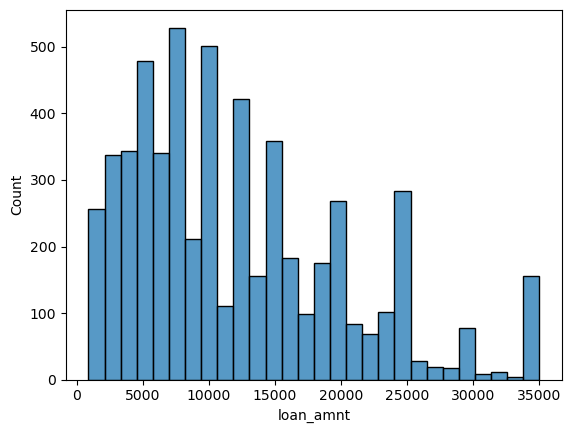

In [54]:
#loan amt 
sns.histplot(x='loan_amnt', data=df[df.loan_status=='Charged Off'])

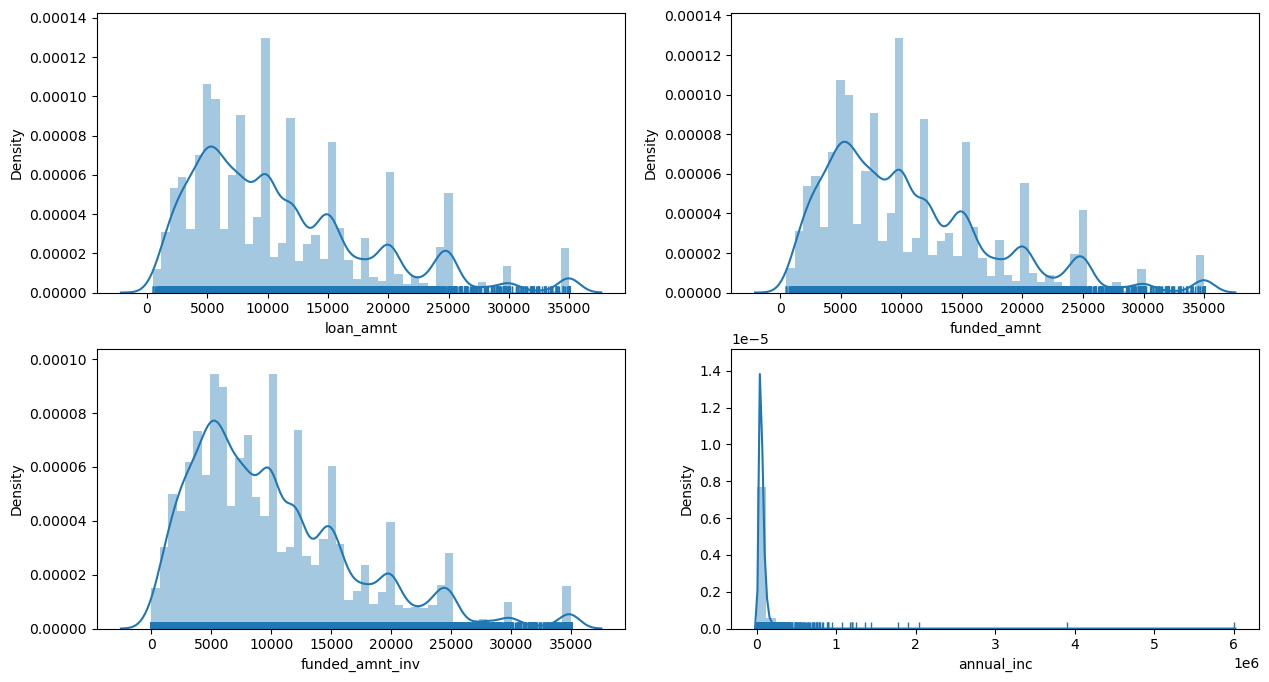

In [55]:
plt.figure(figsize =(15,8))
plt.subplot(2,2,1)
ax = sns.distplot(df['loan_amnt'], rug=True)
plt.subplot(2,2,2)
ax=sns.distplot(df['funded_amnt'], rug=True)
plt.subplot(2,2,3)
ax=sns.distplot(df['funded_amnt_inv'], rug=True)
plt.subplot(2,2,4)
ax=sns.distplot(df['annual_inc'], rug=True)
plt.show()


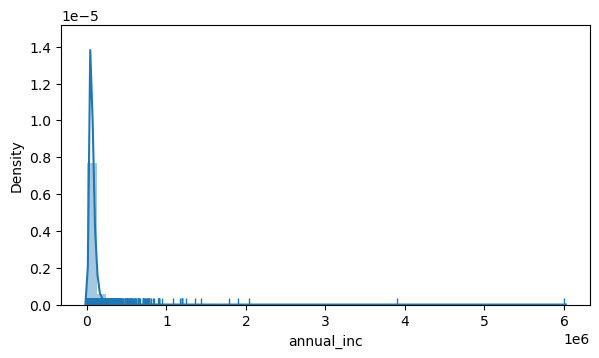

In [56]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,4)
ax=sns.distplot(df['annual_inc'], rug=True)
plt.show()

>lets do a box plot for annual_inc

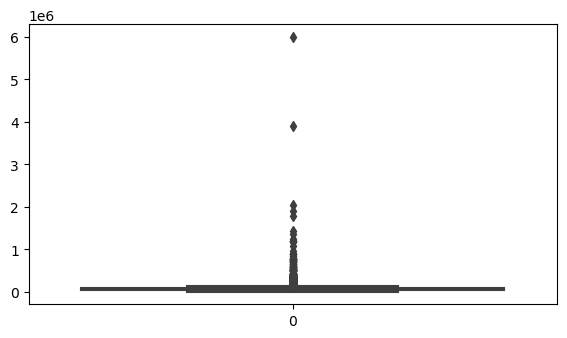

In [57]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,4)
ax=sns.boxplot(df['annual_inc'])
plt.show()

>If you notice above there are several outliers in the above box plot for annual_income and since this is a critical column for analysis the outliers needs to be removed 
* one way to remove outliers is to plot the quantiles and remove the data below 25% and above 75% 

In [58]:
#  calculate IQR for column annual_inc

q1 = df['annual_inc'].quantile(0.25)
q3 = df['annual_inc'].quantile(0.75)
iqr = q3-q1

threshold = 1.5

outliers = df[(df['annual_inc'] < q1- threshold*iqr) | (df['annual_inc']>q3 +threshold*iqr)]

In [59]:
len(outliers)

1762

In [60]:
df= df.drop(outliers.index)

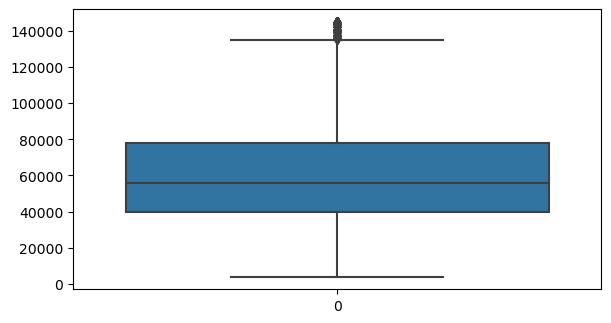

In [61]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,4)
ax=sns.boxplot(df['annual_inc'])
plt.show()

>now if you notice post removal of the outliers we can clearly see the distribution of the annual_inc
* annual_inc are in the range of 40k - 80k

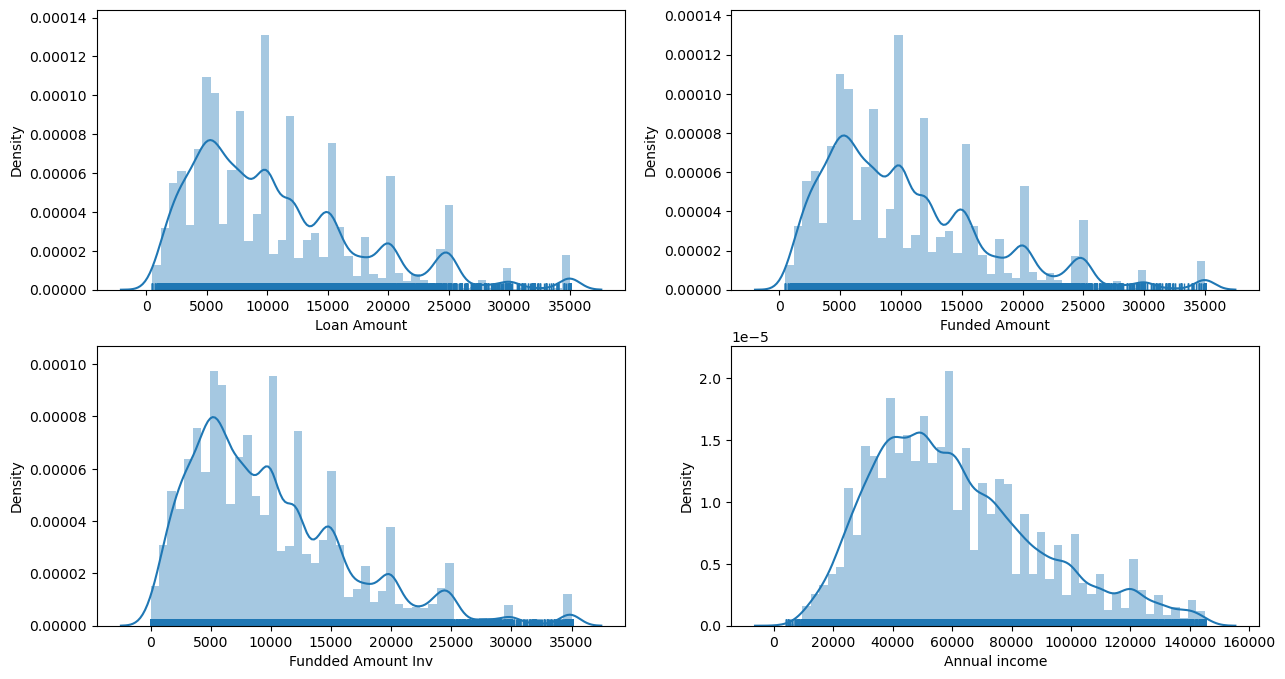

In [62]:
plt.figure(figsize =(15,8))
plt.subplot(2,2,1)
ax = sns.distplot(df['loan_amnt'], rug=True)
#ax.set_title('Loan Amount - Distribution Plot')
ax.set_xlabel('Loan Amount')
plt.subplot(2,2,2)
ax=sns.distplot(df['funded_amnt'], rug=True)
#ax.set_title('Funded Amount - Distribution Plot')
ax.set_xlabel('Funded Amount')
plt.subplot(2,2,3)
ax=sns.distplot(df['funded_amnt_inv'], rug=True)
#ax.set_title('Funded Amount Inv - Distribution Plot')
ax.set_xlabel('Fundded Amount Inv')
plt.subplot(2,2,4)
ax=sns.distplot(df['annual_inc'], rug=True)
#ax.set_title('Annual income  - Distribution Plot')
ax.set_xlabel('Annual income')
plt.show()

>**Inference:**

* The distribution for all the 3 columns loan_amnt, funded_amnt, funded_amnt_inv are all almost the same
* Majority of the loan amounts  taken are within the range of  4000 - 15000

In [63]:
#for col in cont_cols:
 #   sns.histplot(x=df[col])
  #  plt.show()

# Univariate analysis  ( for categorical  variables )

In [64]:
print(cat_cols)

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']


In [65]:
cat_list=['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose']

In [66]:
#for col in cat_list:
   # sns.countplot(x=col, data=df[df.loan_status=='Charged Off'])
    #plt.tight_layout()
  #  plt.show()
    


>**Grade**

<Axes: xlabel='grade', ylabel='count'>

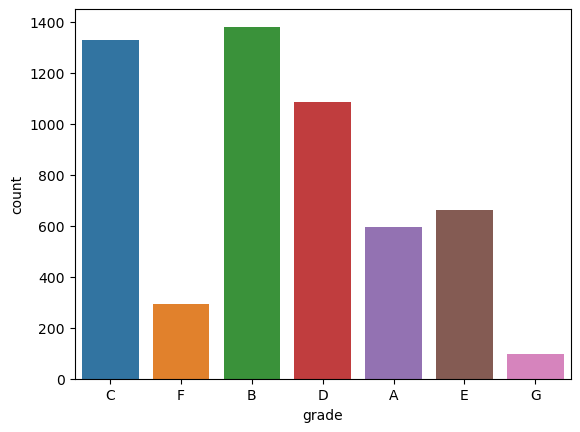

In [67]:
sns.countplot(x='grade', data=df[df.loan_status=='Charged Off'])

>**Inference:**
>> Loan applicants who are in Grade B,D,C have signification number of defaulters

> **TERM**

<Axes: xlabel='term', ylabel='count'>

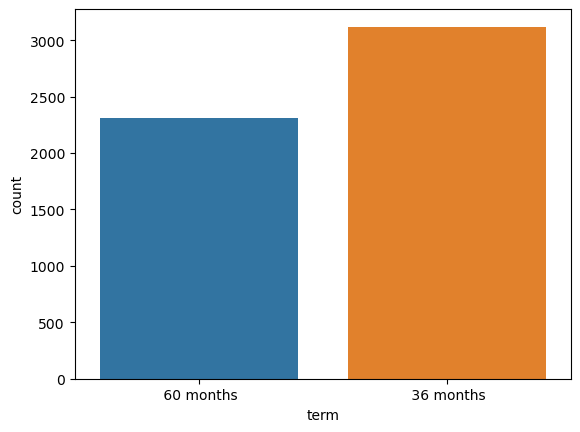

In [68]:
sns.countplot(x='term', data=df[df.loan_status=='Charged Off'])

>**Inference:**

Loan applicants whose term is 36months have high chances of defaulting as per the plot above 

>**EMP_LENGTH**

<Axes: xlabel='emp_length', ylabel='count'>

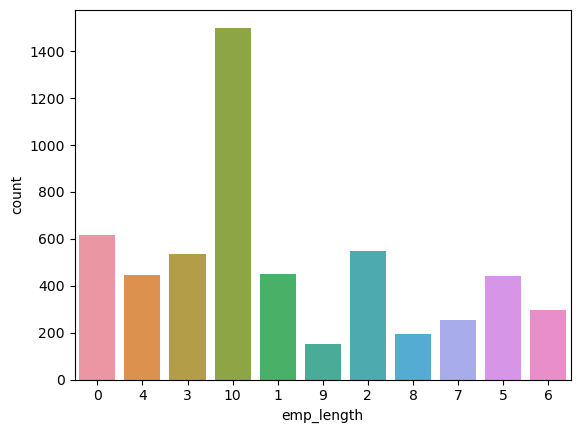

In [69]:
sns.countplot(x='emp_length', data=df[df.loan_status=='Charged Off'])

>**Inference:**
    Applicants who have employement tenure as 10years are more likely to be defaulted 
    > * which ideally does not make any sense because generally with more experience the annual income will be high and hence minimal defaulting 
    > * we will have to do bi-variate analysis on this for further insights combining with other categorical or nunerical values 

>**VERIFICATION STATUS**

<Axes: xlabel='verification_status', ylabel='count'>

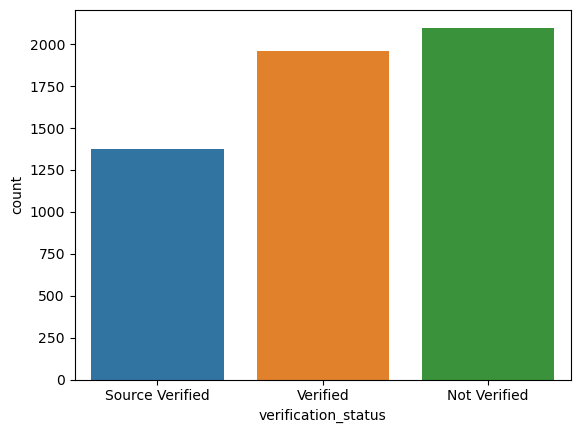

In [70]:
sns.countplot(x='verification_status', data=df[df.loan_status=='Charged Off'])

>**Inference:** Pretty straight forward  applicants who have not be verified have high changes for default 
    however the verified status also is close to defaulters so this required additional analysis with other columns to get more insights 

>**PURPOSE**

<Axes: xlabel='count', ylabel='purpose'>

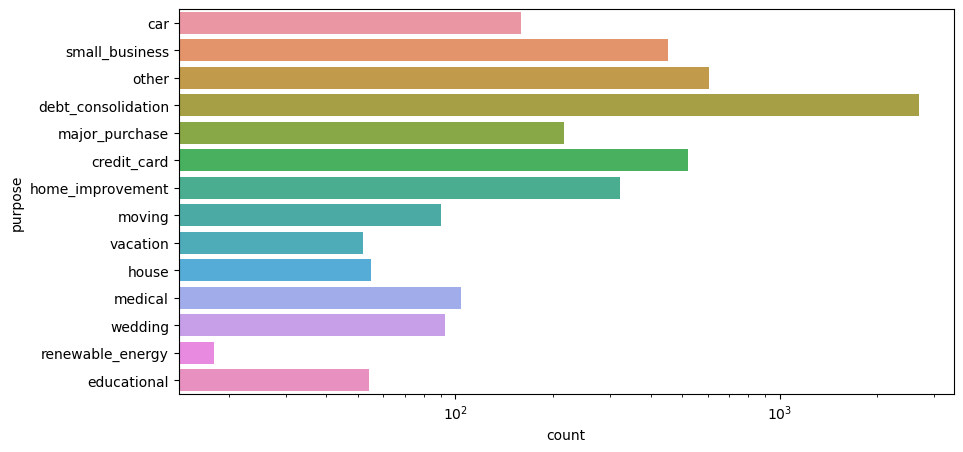

In [71]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set(xscale = 'log')
sns.countplot(y='purpose',data=df[df.loan_status=='Charged Off'])

>**Inference:** Applicants who plan to clear other loans/ debts consolidation are more susceptable for defaulting 

>**HOME OWNERSHIP**

<Axes: xlabel='home_ownership', ylabel='count'>

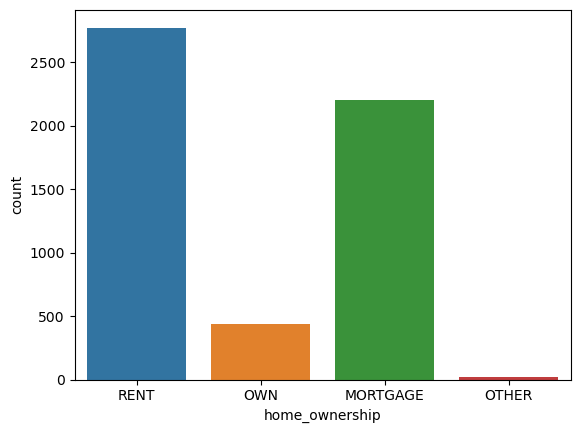

In [72]:
sns.countplot(x='home_ownership',data=df[df.loan_status=='Charged Off'])

>**Inference:**  Applicants on RENT have most possibiity of defaulting on the loan. And the next immediate category is those applications who have mortages have possibilit of defaulting 

>**Summary** : for Univariate Categorical analysis  

* Loan applicants who are part o GRADE B,D,C are more defaulted when compared to others grades
* Loan applicants whose term is 36months have high chances of defaulting!
* Applicants who have employment tenure as 10years are more likely to be defaulted
* Applicants who have not be verified have high changes for default 
* Applicants who plan to clear other loans/ debts consolidation are more susceptible for defaulting!
* Applicants on RENT have most possibility of defaulting on the loan. And the next immediate category is those applications who have mortgages have possibility of defaulting 

# Bivariate Analysis ( between Categorical and Numerical columns )

In [73]:
print(cat_cols)

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']


In [74]:
print(cont_cols)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc']


>In general , **Annual income** , is the most critical attribute that impact the expenses for an individual. Consider this lets plan to perform Bivariate analysis with Annual income and other categorical columns to derive useful insights that defines defaulters  

Below are some of the analysis that would be make sense and derive some insights 
1. Annual income & loan purpoe 
2. Annual income & home ownership
3. Annual income & term

Additionally we can also check for 
1. Loan amount with purpose 
2. Loan amount with home ownership 
3. Loan amount with int rate 

>**Annual income & Loan Purpose**

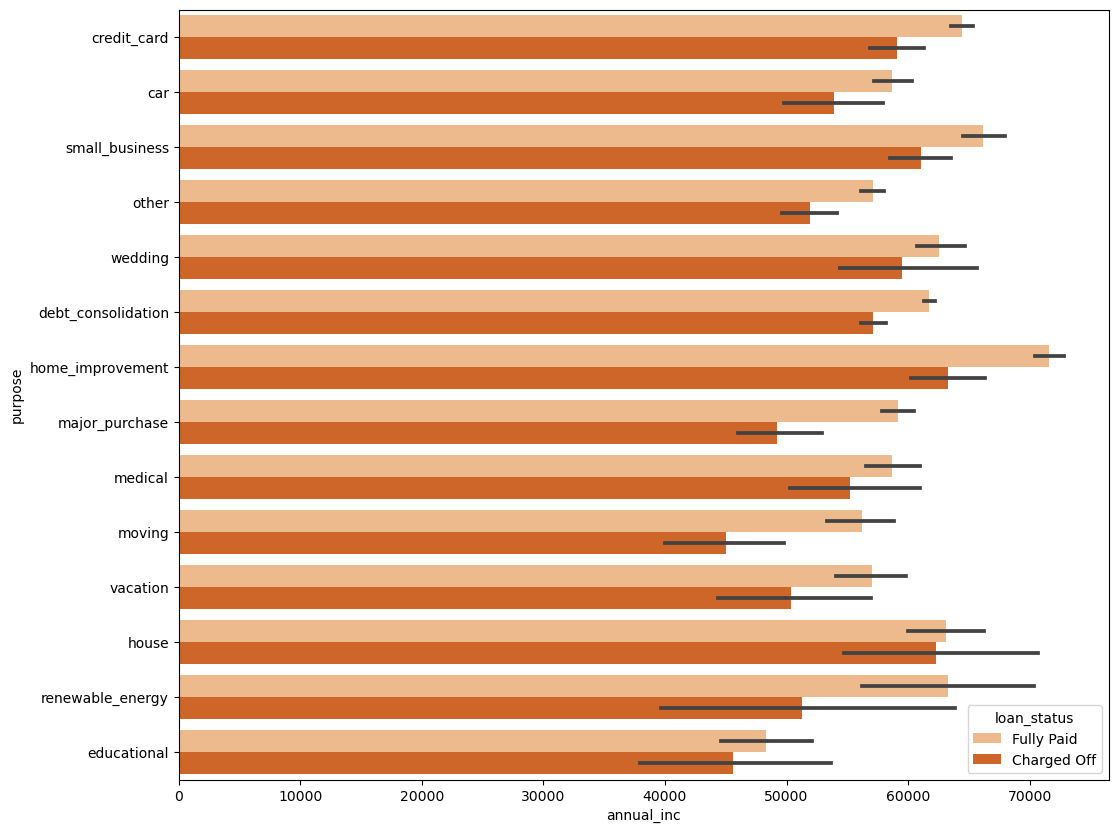

In [75]:
plt.figure(figsize = (12,10))
sns.barplot(data =df, y='purpose', x='annual_inc', hue='loan_status', palette='Oranges')
plt.show()

>**Inference:** Applicants with annual income between 60-70K taken loan for home improvements tend to default in high number with next immediate inline with the small business,credit_card, wedding

>**Annual income with home owner**

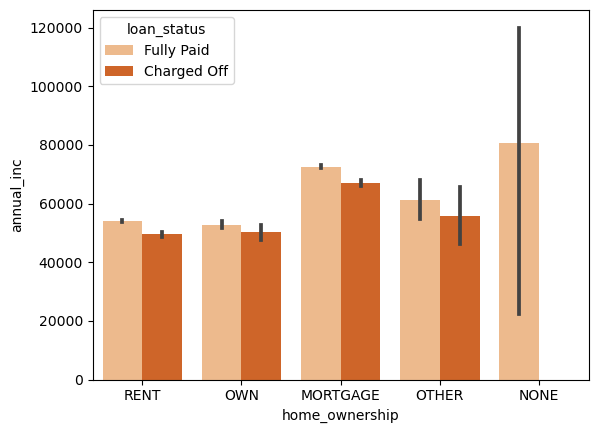

In [76]:
#plt.figure(figsize =(12,10))
sns.barplot(data =df, y='annual_inc', x='home_ownership', hue='loan_status', palette='Oranges')
plt.show()

>**Inference:** Applicants with annual income of 60-70 k and with mortage are the ones who are defaulting maximum

>**Annual income with term**

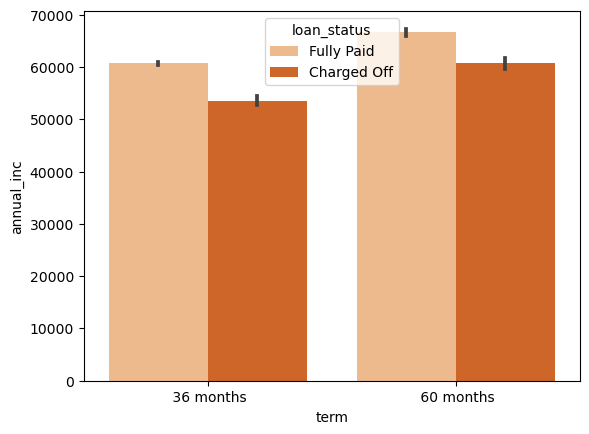

In [77]:
sns.barplot(data= df, x='term', y='annual_inc', hue='loan_status', palette='Oranges')
plt.show()

>**Inference**
* The plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting charged off as compared to applicants who had taken loan for 36 months.

>**Loan amount with Home ownership**

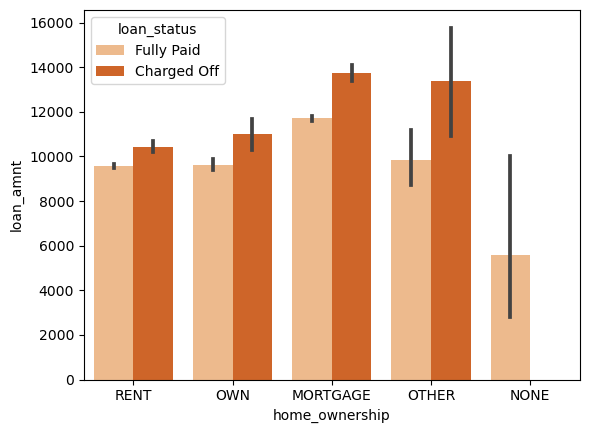

In [78]:
sns.barplot(data =df,y='loan_amnt',x='home_ownership', hue='loan_status', palette='Oranges')
plt.show()

>**Inference:** Applicants whose home ownership is 'MORTGAGE and have loan of 13-14k are possible defaulters

>**Loan amount with purpose**

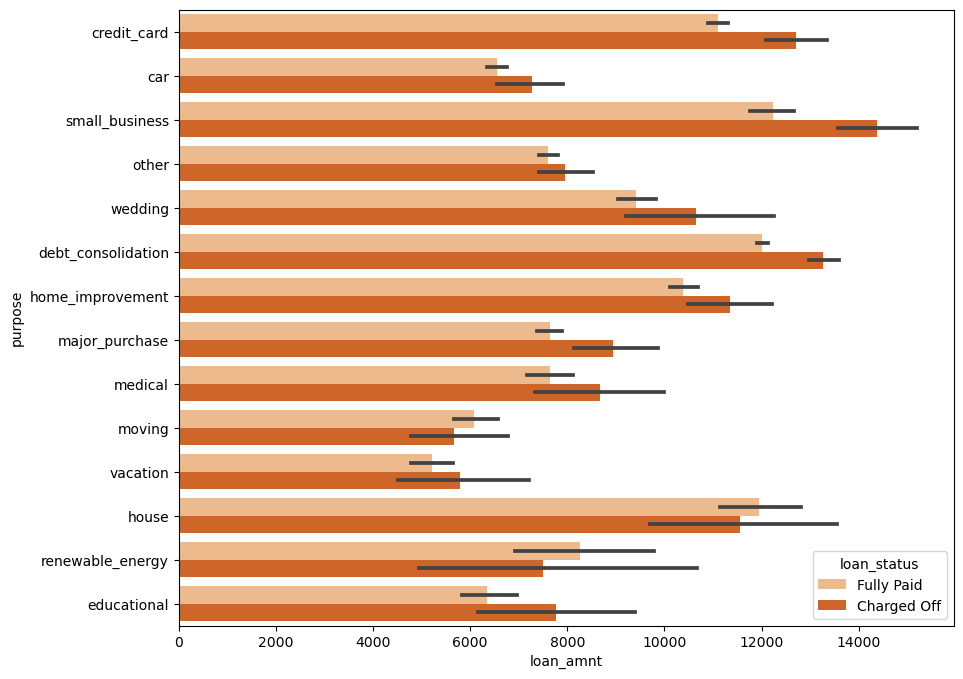

In [79]:
plt.figure(figsize=(10,8))
sns.barplot(data =df, y='purpose',x='loan_amnt',hue='loan_status', palette='Oranges')
plt.show()

>**Inference:** Borrowers seeking loan amounts between 11k and 14k for the purpose of small businesses tend to have a higher defaulter rate. 
The subsequent group with a high likelihood of defaulter primarily consists of those seeking loans for credit card and debt consolidation purposes.


>**loan amount with employee length**

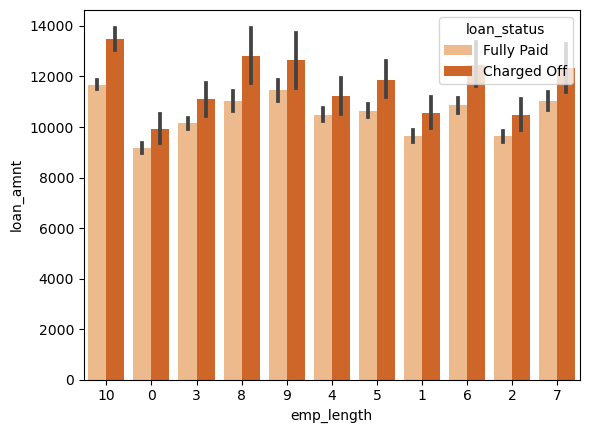

In [80]:
sns.barplot(data =df, x='emp_length', y='loan_amnt',hue='loan_status', palette='Oranges')
plt.show()

>**Inference:** employees having 10 years of experince who took a loan of 13-14k are defaulters 

>**GRADE vs INTEREST RATE**

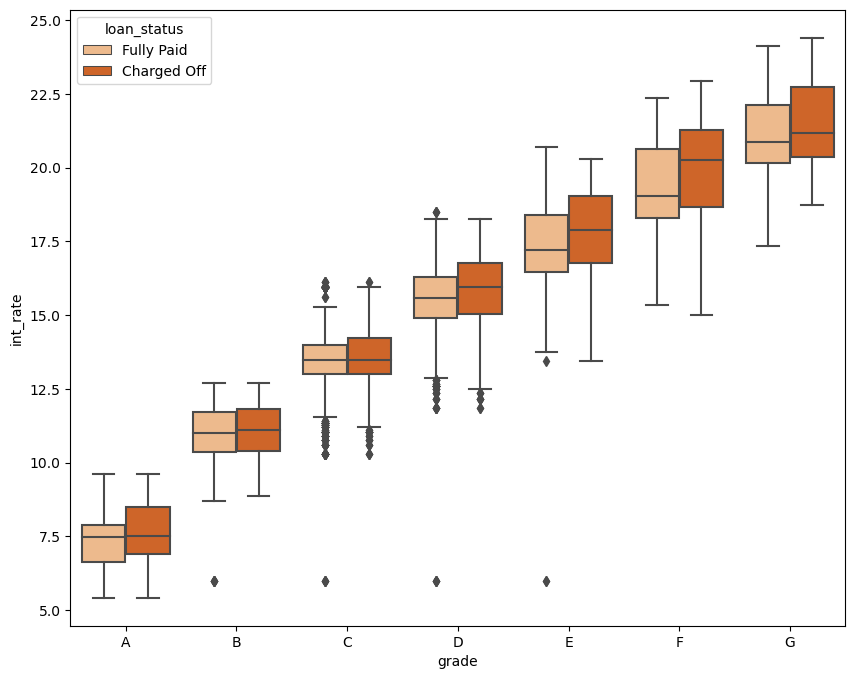

In [81]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(y='int_rate',x='grade', data =df, hue='loan_status',palette='Oranges', order ='ABCDEFG')
plt.show()

>**Inference:**

* A grade, used by banks to assess borrowers, ranges from A for high ratings to F for low ratings.
   
* Interest rates rise as the grade shifts from A to F, signifying that higher-graded applicants receive lower interest rates, while rates increase with a move from A to F.

* Furthermore, with an increase in grade and interest rates, there's a corresponding increase in the likelihood of default, particularly in immediate concerns such as defaults in credit card and debt consolidation.
    

>**LOAN STATUS vs INTEREST**

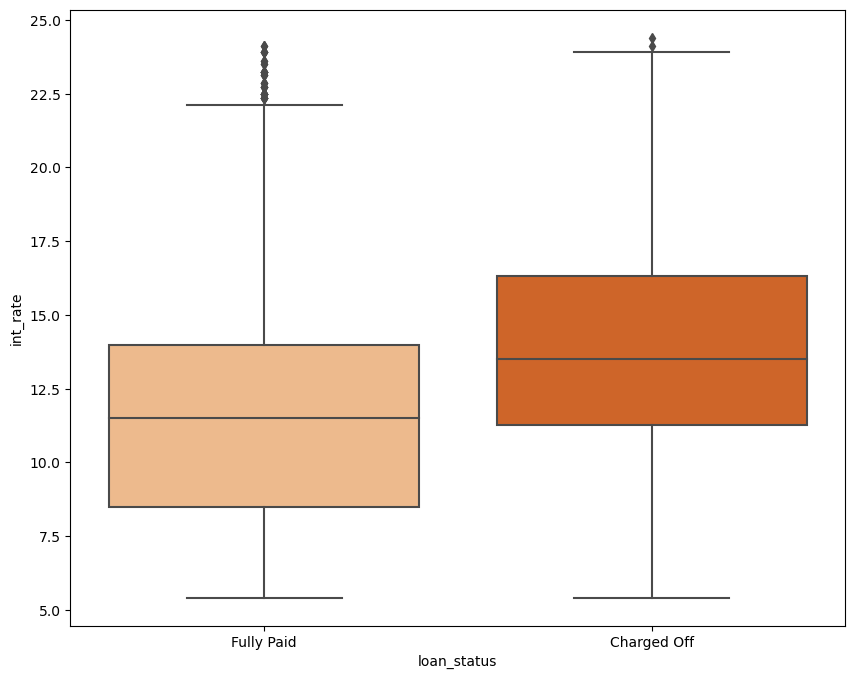

In [82]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(y='int_rate',x='loan_status', data =df, palette='Oranges', )
plt.show()

>**Inference:**
* As the interest rates are increasing beyond 11% there is a trend in the defaulters, and it increases as it moves beyond 14%

In [83]:
df[ cont_cols ].corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_bal,revol_util,total_acc
loan_amnt,1.000000,0.982006,0.936958,0.291471,0.931599,0.403851,0.089219,0.312012,0.071327,0.239838
funded_amnt,0.982006,1.000000,0.954904,0.296498,0.957203,0.399793,0.088305,0.304029,0.075510,0.234627
funded_amnt_inv,0.936958,0.954904,1.000000,0.289214,0.902855,0.382968,0.096156,0.284637,0.080147,0.227214
int_rate,0.291471,0.296498,0.289214,1.000000,0.269339,0.054321,0.111856,0.080850,0.465434,-0.063260
installment,0.931599,0.957203,0.902855,0.269339,1.000000,0.399002,0.078032,0.304369,0.102840,0.213045
annual_inc,0.403851,0.399793,0.382968,0.054321,0.399002,1.000000,-0.075100,0.398812,0.048224,0.386153
dti,0.089219,0.088305,0.096156,0.111856,0.078032,-0.075100,1.000000,0.269573,0.277141,0.245473
revol_bal,0.312012,0.304029,0.284637,0.080850,0.304369,0.398812,0.269573,1.000000,0.316667,0.309621
revol_util,0.071327,0.075510,0.080147,0.465434,0.102840,0.048224,0.277141,0.316667,1.000000,-0.075697
total_acc,0.239838,0.234627,0.227214,-0.063260,0.213045,0.386153,0.245473,0.309621,-0.075697,1.000000


>**CORRELATION**

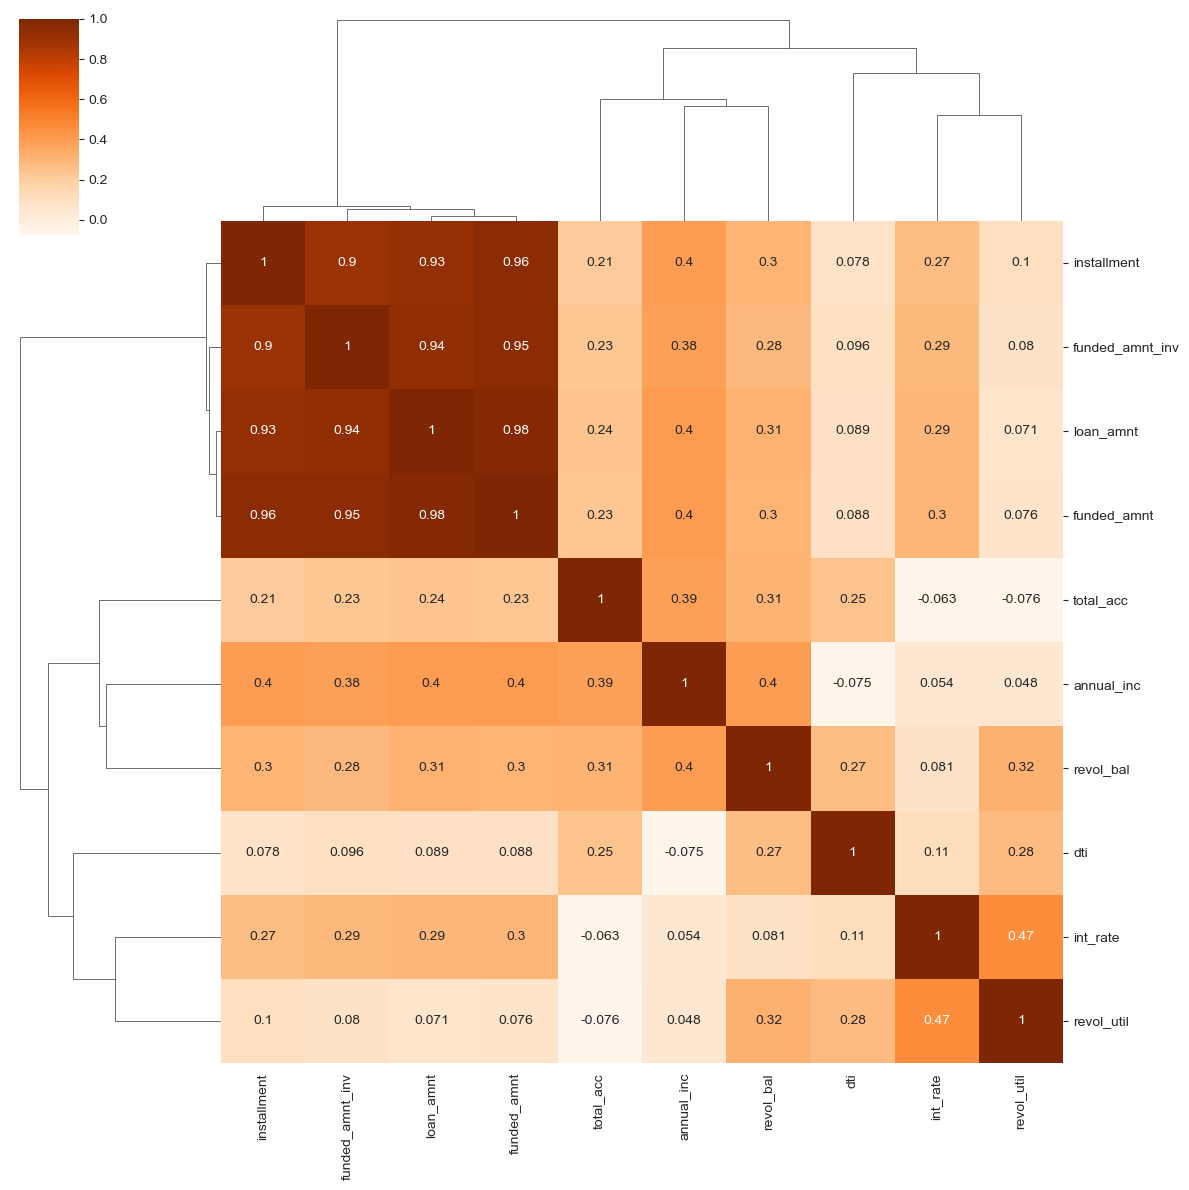

In [84]:
sns.set_style('whitegrid')
sns.clustermap(data=df[ cont_cols ].corr(), cmap='Oranges' ,figsize=(12,12), annot=True)
plt.show()

>**Inference:**
* installment, funded_amnt, loan_amnt have  high correlation as per the above cluster map
* additionally public records related fields pub_rec & pub_rec_bankrupcies and number of accounts related fields open_acc & total_acc are correlated

# 

>>**Final Summary**
* Observation on Grades: Loan applicants falling within grades B, D, and C demonstrate higher defaulter rates compared to other grade categories.
* Term Impact on Defaulting: Loan applicants with a term of 36 months show a higher likelihood of defaulting.
* Employment Length and Defaulting: Applicants with a tenure of 10 years in employment are more prone to defaulting. However, this contradicts the typical understanding that longer job experience correlates with higher annual income and lower default rates. Bivariate analysis is necessary to explore this in conjunction with other factors for deeper insights.
* Verification Status and Default Probability: Applicants who have not been verified exhibit a higher chance of default. However, verified status also shows a proximity to defaulters, necessitating further analysis with additional columns for comprehensive insights.
* Loan Purpose and Default Probability: Applicants intending to clear other loans or consolidate debts are more susceptible to defaulting.
* Home Ownership and Defaulting Probability: Those who rent their homes have the highest likelihood of defaulting on a loan, followed by applicants with mortgages.
* Annual Income, Purpose, and Defaulting: Applicants earning an annual income between $60,000 and $70,000, seeking loans for home improvements, tend to default in higher numbers, followed closely by those seeking loans for small businesses, credit cards, and weddings.
* Annual Income and Home Ownership Impact on Defaulting: Applicants with an annual income of $60,000 to $70,000 and with mortgages are the most frequent defaulters.
* Loan Amount and Home Ownership Impact on Defaulting: Applicants owning homes with mortgages and having loans within the range of $13,000 to $14,000 show a propensity for defaulting.
* Loan Amount and Purpose Impact on Defaulting: Borrowers seeking loan amounts between $11,000 and $14,000 for small business purposes exhibit a higher rate of defaulting, followed by those seeking loans for credit cards and debt consolidation.
* Loan Amount and Employee Length Impact on Defaulting: Borrowers with a decade of work experience, borrowing between $13,000 and $14,000, tend to default on their loans.
* Relationship between Grade and Interest Rate: Grading, used by banks to evaluate borrowers from A to F, influences interest rates. Interest rates rise with a shift from A to F, indicating that higher-graded applicants receive lower rates. This increase in grade and interest rates corresponds with a higher likelihood of default, particularly in credit card and debt consolidation defaults.
* Loan Status in Relation to Interest Rates: There's an observable trend in defaulters as interest rates exceed 11%, further increasing as it surpasses 14%.


# Additional analysis using Information value (IV) and Weight of evidence

>>**Information Value**

Once again seperating Categorical and Numerical Columns

In [85]:
cat_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', \
            'purpose', 'pub_rec_bankruptcies', 'addr_state' ]

num_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', \
            'revol_bal', 'revol_util', 'total_acc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec']

Creating derived columns out of dates

In [86]:
date_cols = [ 'issue_d', 'earliest_cr_line' ]
date_derived_cols = []

for col in date_cols:
    month_col = col + '_month'
    year_col = col + '_year'
    df[ month_col ] = df[col].str.split('-').apply(lambda x: x[0])
    df[ year_col ] = df[col].str.split('-').apply(lambda x: x[1])
    date_derived_cols.extend([ month_col, year_col ])

# Removing the date columns from category column list and adding the derived columns
cat_cols = [ instance for instance in cat_cols if instance not in date_cols ] + \
                date_derived_cols

Defining important functions

In [87]:
def iv_calculation(df:pd.DataFrame, x_col:str, y_col:str, target:str, non_target:str):
    '''Function that calculated the information value of x_col for prediction of y_col'''
    
    total_y_target_count = ( df[y_col] == target ).sum()
    total_y_non_target_count = ( df[y_col] == non_target ).sum()
    
    iv_total = 0
    woe_iv_dlist = []
    df_groupby_x = df.groupby(by=x_col)
    for x_col_val, x_group_data in df_groupby_x:
        
        x_group_y_target_count = (x_group_data[y_col] == target).sum()
        x_group_y_non_target_count = (x_group_data[y_col] == non_target).sum()
        
        x_group_y_target_ratio = (x_group_y_target_count / total_y_target_count)
        x_group_y_non_target_ratio = ( x_group_y_non_target_count / total_y_non_target_count )
        
        if x_group_y_target_ratio == 0:
            continue
        if x_group_y_non_target_ratio == 0:
            continue
        
        x_group_woe = np.log(x_group_y_target_ratio) - np.log(x_group_y_non_target_ratio)
        x_group_iv = x_group_woe * (x_group_y_target_ratio - x_group_y_non_target_ratio)
        woe_iv_dlist += [ [x_col_val, x_group_woe, x_group_iv] ]
        
        iv_total += x_group_iv
    
    return iv_total, woe_iv_dlist
    

In [88]:
def plot_woe_iv_heatmap(col_name:str, total_iv_value_for_col:float, woe_iv_for_col_ddf:pd.DataFrame, annot_dec=2) -> None:
    '''Function that plots heatmap of woe and iv provided'''
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(5, len(woe_iv_for_x_col_ddf.index)/3))
    plt.subplots_adjust(wspace=0.5)
    plt.title(f'Col: "{col}"\n Total IV: {total_iv_value_for_col:.2f}')
    
    sns.heatmap(woe_iv_for_col_ddf[ ['woe'] ], annot=True, fmt=f'.{annot_dec}f', center=0, ax=ax1)
    sns.heatmap(woe_iv_for_col_ddf[ ['iv'] ], annot=True, fmt=f'.{annot_dec}f', center=0, ax=ax2)
    plt.show()
    

In [89]:
def tuple1_subset_of_tuple2(tup1:tuple, tup2:tuple) -> bool:
    '''Function to check if tuple1 is a subset of tuple2'''
    check = all([ True if elt in tup2 else False for elt in tup1 ])
    return check

>**Categorical Columns**

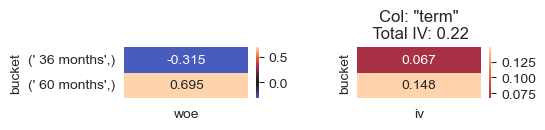

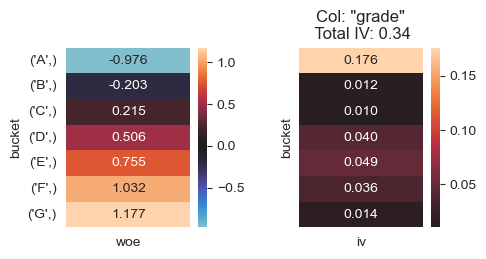

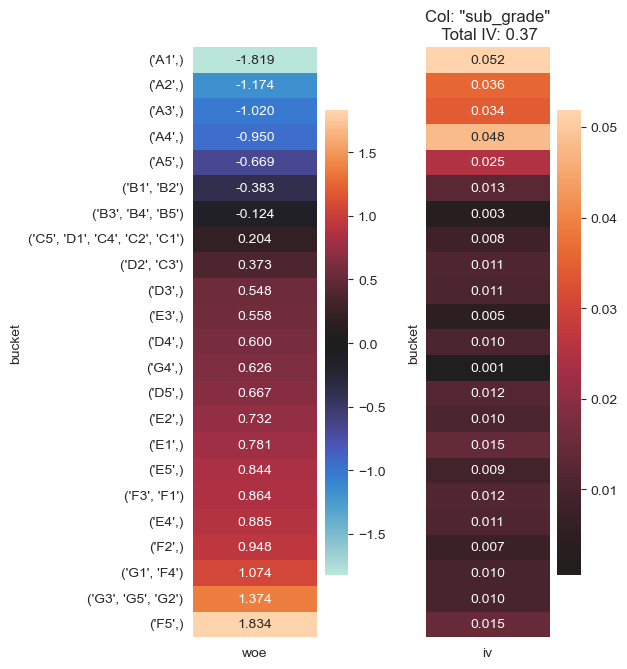

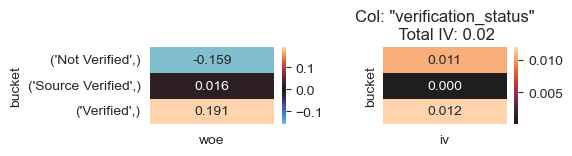

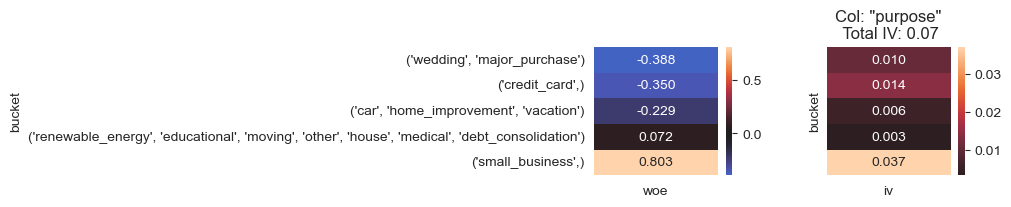

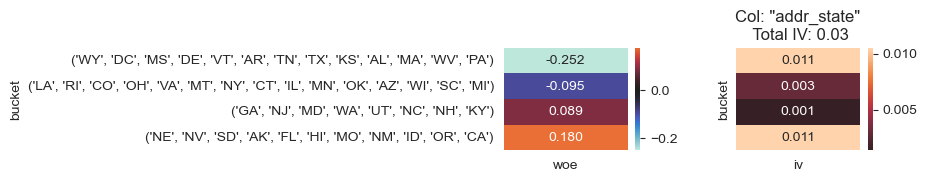

In [90]:
def custom_func_4_iv_woe_calc(col_iv_calc_ddf, col):
    '''Custom function to calculate IV and WOE for Categorical Columns'''

    total_iv_value_for_x_col, woe_for_x_col_ddict = iv_calculation(col_iv_calc_ddf, 
                                                             x_col=col, 
                                                             y_col='loan_status', 
                                                             target='Charged Off', 
                                                             non_target='Fully Paid')
    woe_iv_for_x_col_ddf = pd.DataFrame(woe_for_x_col_ddict, 
                                        columns=[ 'bucket', 'woe', 'iv' ]).set_index('bucket').sort_values(by='woe')

    neg_woe_ddf = woe_iv_for_x_col_ddf[ woe_iv_for_x_col_ddf['woe'] <= 0 ]
    pos_woe_ddf = woe_iv_for_x_col_ddf[ woe_iv_for_x_col_ddf['woe'] > 0 ].sort_values(by='woe', ascending=False)

    return total_iv_value_for_x_col, woe_iv_for_x_col_ddf, neg_woe_ddf, pos_woe_ddf
        
for col in cat_cols:
    
    col_iv_calc_ddf = df[ [col, 'loan_status'] ].copy()
    col_iv_calc_ddf[ col ] = col_iv_calc_ddf[ col ].apply(lambda x: (x,))

    if col != 'loan_status':

        # Initial IV and WOE calculation before optimal bins
        total_iv_value_for_x_col, woe_iv_for_x_col_ddf, neg_woe_ddf, pos_woe_ddf = custom_func_4_iv_woe_calc(col_iv_calc_ddf, col)

        neg_woe_idx = 0
        pos_woe_idx = 0

        # Figuring out optimum bin for all categories negatively correlated with default
        while ( neg_woe_idx < (len(neg_woe_ddf) - 1) ) \
            and ( total_iv_value_for_x_col > 0.02 ):

            if ( neg_woe_ddf.iloc[ neg_woe_idx ]['iv'] < 0.01 ) \
                and ( neg_woe_ddf.iloc[ neg_woe_idx+1 ]['iv'] < 0.01 ):

                prst_cat = neg_woe_ddf.index[ neg_woe_idx ]
                nxt_cat = neg_woe_ddf.index[ neg_woe_idx+1 ]
                comb_cat = prst_cat + nxt_cat

                col_iv_calc_ddf[ col ] = col_iv_calc_ddf[ col ].apply(lambda x: \
                                                                     comb_cat if tuple1_subset_of_tuple2(x, comb_cat) \
                                                                     else x)

                total_iv_value_for_x_col, woe_iv_for_x_col_ddf, neg_woe_ddf, pos_woe_ddf = custom_func_4_iv_woe_calc(col_iv_calc_ddf, col)

            else:
                neg_woe_idx += 1

        # Figuring out optimum bin for all categories positively correlated with default
        while ( pos_woe_idx < (len(pos_woe_ddf) - 1) ) \
            and ( total_iv_value_for_x_col > 0.02 ):

            if ( pos_woe_ddf.iloc[ pos_woe_idx ]['iv'] < 0.01 ) \
                and ( pos_woe_ddf.iloc[ pos_woe_idx+1 ]['iv'] < 0.01 ):

                prst_cat = pos_woe_ddf.index[ pos_woe_idx ]
                nxt_cat = pos_woe_ddf.index[ pos_woe_idx+1 ]
                comb_cat = prst_cat + nxt_cat

                col_iv_calc_ddf[ col ] = col_iv_calc_ddf[ col ].apply(lambda x: \
                                                                     comb_cat if tuple1_subset_of_tuple2(x, comb_cat) \
                                                                     else x)

                total_iv_value_for_x_col, woe_iv_for_x_col_ddf, pos_woe_ddf, pos_woe_ddf = custom_func_4_iv_woe_calc(col_iv_calc_ddf, col)

            else:
                pos_woe_idx += 1

        # Plotting the final result
        if total_iv_value_for_x_col > 0.02:
            plot_woe_iv_heatmap(col_name=col, 
                                total_iv_value_for_col=total_iv_value_for_x_col, 
                                woe_iv_for_col_ddf=woe_iv_for_x_col_ddf, 
                                annot_dec=3)

Inference from the above heatmaps:<br>
+ Good Customers with less Default Chance:
    + Shorter term, less likely to default
    + Grades higher than B5 are less likely to default. Higher the grade, lesser the chance of default
    + Income Verified, less chance of default
    + Best purpose of loans for less chance of default: weddings, major purchases, credit cards
    + Next best purposes: car, home_improvement, vacation
    + States with best customers: WY, DC, MS, DE, VT, AR, TN, TX, KS, AL, MA, WV, PA
+ Bad Customers with more Default Chance:
    + Longer term, more likely to default
    + Grades lower than C1 are likely to default. Lower the grade, more chance of defaulting
    + Income not verified, higher chance of default
    + Worst purpose of loans: fund small business
    + States with worst customers: NE. NV, SD, AK, FL, HI, MO, NM, ID, OR, CA

>**Numerical Columns**

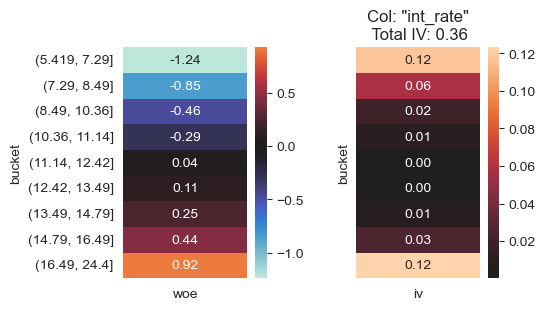

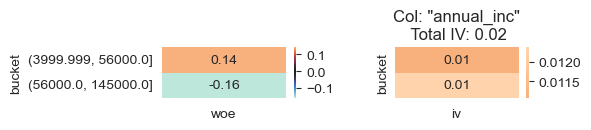

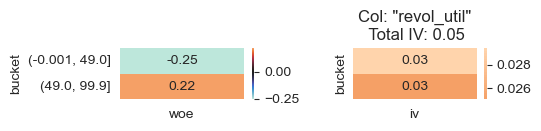

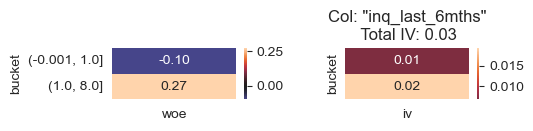

In [91]:
for col in num_cols:
    col_iv_calc_ddf = df[ [col, 'loan_status'] ].copy()
    bin_100_col = col + '_bins_100'
    col_iv_calc_ddf[ bin_100_col ] = pd.qcut( col_iv_calc_ddf[col], q=10, duplicates='drop' )
    
    iv_value_for_x_col_100_buckets, _ = iv_calculation(col_iv_calc_ddf, x_col=bin_100_col, y_col='loan_status', target='Charged Off', non_target='Fully Paid')

    if iv_value_for_x_col_100_buckets > 0.02:
        
        num_bins_optim = max([ int(np.floor( iv_value_for_x_col_100_buckets / 0.04 )), 2 ])
        
        bin_optim_col = col + '_bins_optim'
        col_iv_calc_ddf[ bin_optim_col ] = pd.qcut( col_iv_calc_ddf[col], q=num_bins_optim, duplicates='drop' )
    
        iv_value_for_x_col_optim_buckets, woe_for_x_col_ddict = iv_calculation(col_iv_calc_ddf, x_col=bin_optim_col, y_col='loan_status', target='Charged Off', non_target='Fully Paid')
        woe_iv_for_x_col_ddf = pd.DataFrame(woe_for_x_col_ddict, columns=[ 'bucket', 'woe', 'iv' ]).set_index('bucket').sort_index()
        
        if iv_value_for_x_col_optim_buckets > 0.02:
            
            plot_woe_iv_heatmap(col_name=col, total_iv_value_for_col=iv_value_for_x_col_optim_buckets, woe_iv_for_col_ddf=woe_iv_for_x_col_ddf)

Inference from the above heatmap:<br>
+ Good Customers with less Default Chance:
    + Lesser the interest rate for the loan, lesser chance of default.
    + Best option is below 8%. Next best option is below 10%
    + Higher the income, lesser the default
    + Lower credit utilization percentage, lower default chance.
+ Bad Customers with more Default Chance:
    + Higher the interest rate for the loan, higher the chance of default.
    + Avoid giving loans above 14%, they have high chance of default
    + Lower the income, higher the default
    + Higher credit utilization percentage, higher default chance.
    + High likelyhood of a default if more than 2 inquiries made in last 6 months

>>**IV and WOE Analysis Conclusion**

Ideal Customer:
+ Loan requested has shorter term
+ They have higher grade, but not below B5
+ Income is verified
+ Loan is requested for (in the best case) weddings, major purchases and credit cards. Right after these, the next best cases are car, home_improvement and vacation.
+ The customer is from any of the following states: WY, DC, MS, DE, VT, AR, TN, TX, KS, AL, MA, WV, PA
+ Loan requested is of lower interest rate. The interest rate should not exceed 8% if ideal, else 10% which is the next best.
+ Should have a higher income
+ Should have a lower credit utilization

Worst Customer:
+ Loan requested is long term
+ Lower grade, lower than C1
+ Income not verified
+ Loan is to fund a small business
+ Is from any of the following states: NE. NV, SD, AK, FL, HI, MO, NM, ID, OR, CA
+ The loan requested for is of higher interest rate, more than 14%
+ Has a lower income
+ Has a higher credit utilization percentage
+ He has more than or equal to 2 inquiries in the past 6 months

Since IV and WOE is an objective way of analysis, we need only consider these above factors while giving out loans

>>>>>>>>> # THANK YOU 